In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
data_path = r'C:\Users\sajid\Desktop\DS\Assignment-02\csvFiles'

In [3]:
all_csv = []
for file in os.listdir(data_path):
    all_csv.append(pd.read_csv(os.path.join(data_path,file)))
full_data = pd.concat(all_csv)

In [4]:
full_data.count()

name      596931
sex       596931
births    596931
year      596931
dtype: int64

In [5]:
print('Total Observations: ',full_data.shape[0])

Total Observations:  596931


In [6]:
print('Total Unique Names: ',len(full_data['name'].unique()))

Total Unique Names:  66648


In [7]:
print('Total Births: ', full_data['births'].sum())

Total Births:  75509584


In [8]:
#print('Average births per unique name: ', full_data['births'].sum() / len(full_data['name'].unique()))

# Task-1: Table containing "Total Observations", "Total Unique Names", "Total Births", "Average Births per Unique Name"

In [9]:
table_1 = pd.DataFrame([[full_data.shape[0],len(full_data['name'].unique()),full_data['births'].sum(),full_data['births'].sum() / len(full_data['name'].unique())]], columns=['Total Observations', 'Total Unique Names', 'Total Births', 'Average births per unique name'])
table_1

,Total Observations,Total Unique Names,Total Births,Average births per unique name
0,596931,66648,75509584,1132.960989


In [10]:
#Average Births per Unique Name
full_data.groupby('name')['births'].mean().sort_values(ascending=False).head(10)

name
Michael        16665.675
Jacob          14310.025
Matthew        13572.050
Joshua         13344.850
Christopher    13153.825
Daniel         11465.375
Andrew         11405.925
Emily          11404.325
Joseph         10979.650
Nicholas       10878.575
Name: births, dtype: float64

In [11]:
#pd.pivot_table(full_data, index=['year','sex'], values=['births'], aggfunc="sum")

In [12]:
gender_year_data = pd.pivot_table(full_data, index=['sex','year'], values=['births'], aggfunc="sum")

In [13]:
gender_year_data['births']

sex  year
F    1991    1874110
     1992    1842818
     1993    1807795
     1994    1784407
     1995    1757240
     1996    1751681
     1997    1739331
     1998    1765390
     1999    1772139
     2000    1813960
     2001    1798284
     2002    1794358
     2003    1824406
     2004    1833005
     2005    1843890
     2006    1896468
     2007    1916888
     2008    1883645
     2009    1827643
     2010    1759010
M    1991    2019018
     1992    1995760
     1993    1959712
     1994    1930363
     1995    1902100
     1996    1892700
     1997    1883571
     1998    1909676
     1999    1918267
     2000    1961702
     2001    1940498
     2002    1938941
     2003    1972439
     2004    1981557
     2005    1993285
     2006    2050234
     2007    2069242
     2008    2032310
     2009    1973359
     2010    1898382
Name: births, dtype: int64

In [14]:
gender_year_data.loc['M', 'births']

year
1991    2019018
1992    1995760
1993    1959712
1994    1930363
1995    1902100
1996    1892700
1997    1883571
1998    1909676
1999    1918267
2000    1961702
2001    1940498
2002    1938941
2003    1972439
2004    1981557
2005    1993285
2006    2050234
2007    2069242
2008    2032310
2009    1973359
2010    1898382
Name: births, dtype: int64

# Task-2: Gender-based comparison of no.of births over the years

In [15]:
import matplotlib.pyplot as plt

In [16]:
# to understand pivot_table output
print(gender_year_data.loc['M','births'].shape)
print(gender_year_data.loc['M'].shape)
full_data['year'].unique()

(20,)
(20, 1)


array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010], dtype=int64)

In [17]:
year = full_data['year'].unique()#[1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
m_births = gender_year_data.loc['M','births']#[2019018,1995760,1959712,1930363,1902100,1892700,1883571,1909676,1918267,1961702,1940498,1938941,1972439,1981557,1993285,2050234,2069242,2032310,1973359,1898382]
f_births = gender_year_data.loc['F','births']

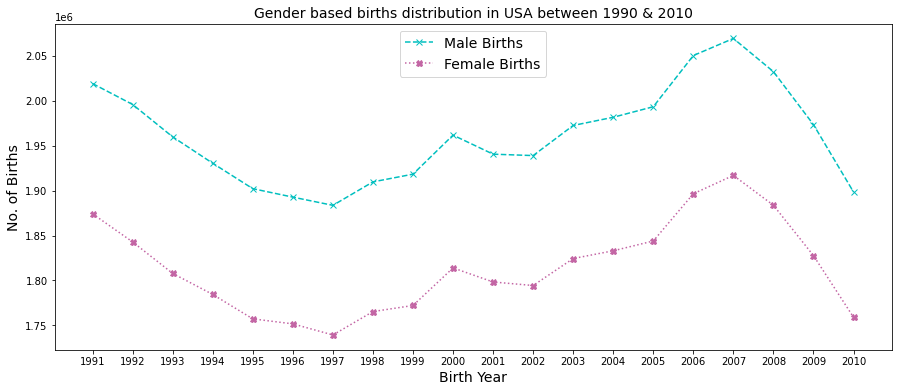

In [18]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(year,m_births, 'x--c' ,label='Male Births')
plt.plot(year,f_births, color='#c365a4', linestyle=':', marker='X', label='Female Births')
plt.title('Gender based births distribution in USA between 1990 & 2010', fontsize=14)
plt.xlabel('Birth Year', fontsize=14)
plt.ylabel('No. of Births', fontsize=14)
plt.xticks(year)
plt.legend(loc='upper center', fontsize=14)

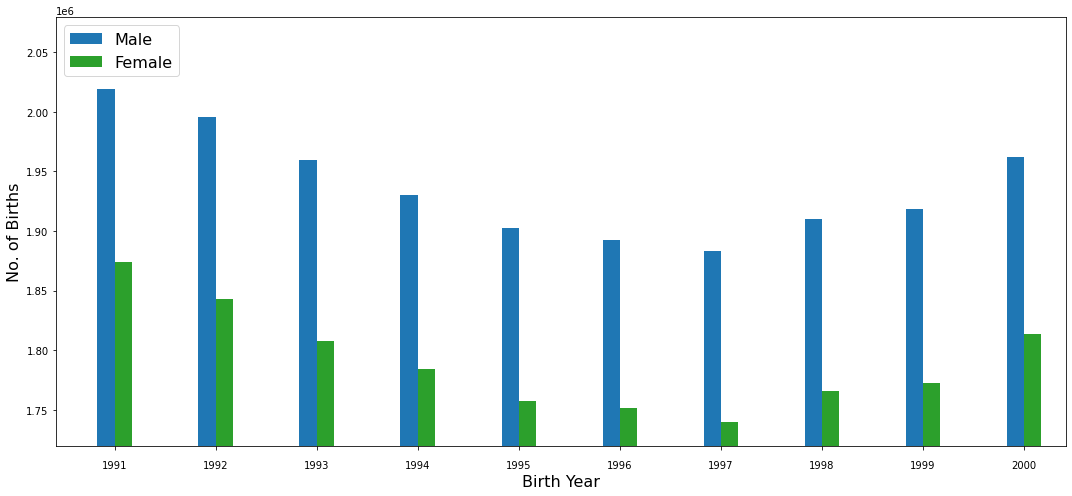

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
width = 0.17
x = np.arange(len(year))
ax.set_ylim(min(f_births)-20000,max(m_births)+10000)

rects1 = ax.bar(year, m_births, width, label='Male')
rects2 = ax.bar(year+width, f_births, width, label='Female', color='#2ca02c')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Births', fontsize=16)
#ax.set_ylim(35,100)
ax.set_xlabel('Birth Year', fontsize=16)
#ax.set_title('Performance comparison on inpainted data')
ax.set_xticks(year+(width/2))
ax.tick_params(axis='x', which='major', pad=10)
ax.set_xticklabels(year)
ax.legend(loc='upper left', fontsize=16)
ax.set_xlim(1990.5,2000.5)
fig.tight_layout()

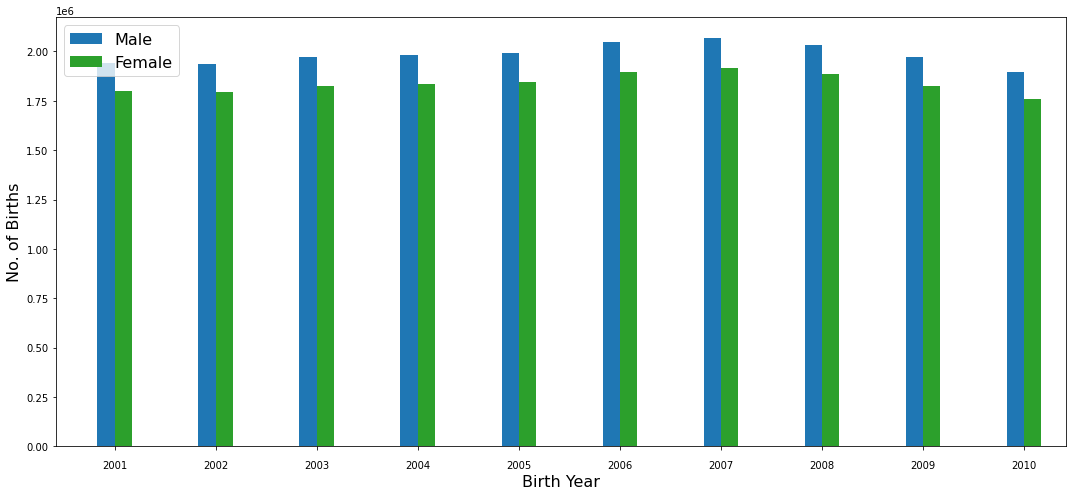

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(year, m_births, width, label='Male')
rects2 = ax.bar(year+width, f_births, width, label='Female', color='#2ca02c')
ax.set_ylabel('No. of Births', fontsize=16)
#ax.set_ylim(35,100)
ax.set_xlabel('Birth Year', fontsize=16)
#ax.set_title('Performance comparison on inpainted data')
ax.set_xticks(year+(width/2))
ax.tick_params(axis='x', which='major', pad=10)
ax.set_xticklabels(year)
ax.legend(loc='upper left', fontsize=16)
ax.set_xlim(2000.5,2010.5)

fig.tight_layout()

# Task-3: 3 most and least popular Male & Female Names

In [21]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596931 entries, 0 to 33837
Data columns (total 4 columns):
name      596931 non-null object
sex       596931 non-null object
births    596931 non-null int64
year      596931 non-null int64
dtypes: int64(2), object(2)
memory usage: 22.8+ MB


In [22]:
#full_data.groupby(['name','sex'])['births'].sum()

In [23]:
name_gender_data = pd.pivot_table(full_data, index=['name','sex'], values=['births'], aggfunc="sum")

In [24]:
name_gender_data['births'].describe()

count     72974.000000
mean       1034.746403
std       11477.697906
min           5.000000
25%          10.000000
50%          37.000000
75%         160.000000
max      664116.000000
Name: births, dtype: float64

In [25]:
name_gender_data.sort_values(['sex','births'],ascending=False)
indiv = name_gender_data[name_gender_data.births.max()==name_gender_data.births]
indiv.index[0][1]

'M'

In [26]:
male_name_count = name_gender_data[name_gender_data.index.get_level_values('sex') == 'M'].sort_values(['births'],ascending=False)
female_name_count = name_gender_data[name_gender_data.index.get_level_values('sex') == 'F'].sort_values(['births'],ascending=False)

In [27]:
popular_names = []

for i in range(0,3):
    popular_names.append([female_name_count.index[i][0],female_name_count.index[i][1],female_name_count['births'][i]])
for i in range(-3,0):
    popular_names.append([female_name_count.index[i][0],female_name_count.index[i][1],female_name_count['births'][i]])    
for i in range(0,3):    
    popular_names.append([male_name_count.index[i][0],male_name_count.index[i][1],male_name_count['births'][i]])
for i in range(-3,0):    
    popular_names.append([male_name_count.index[i][0],male_name_count.index[i][1],male_name_count['births'][i]])    
#popular_names

In [28]:
table_2 = pd.DataFrame(popular_names, columns=['Name', 'Gender', 'Frequency'])
table_2

,Name,Gender,Frequency
0,Emily,F,455432
1,Ashley,F,395380
2,Jessica,F,350232
3,Kishon,F,5
4,Tahliah,F,5
5,Aabriella,F,5
6,Michael,M,664116
7,Jacob,M,571319
8,Matthew,M,541870
9,Daejion,M,5


In [29]:
male_name_count.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 28648 entries, (Michael, M) to (Zzyzx, M)
Data columns (total 1 columns):
births    28648 non-null int64
dtypes: int64(1)
memory usage: 3.4+ MB


In [30]:
male_name_count.iloc[0]
male_name_count.index[0][0]

'Michael'

In [31]:
# Get no. of births for most popular names
michael_count = full_data.loc[full_data['name']==male_name_count.index[0][0]]
emily_count = full_data.loc[full_data['name']==female_name_count.index[0][0]]

In [32]:
#michael_count.iloc[0:19]
michael_male = michael_count[michael_count['sex']=='M'].births
michael_female = michael_count[michael_count['sex']=='F'].births
emily_male = emily_count[emily_count['sex']=='M'].births
emily_female = emily_count[emily_count['sex']=='F'].births

In [33]:
#emily_male
#emily_female

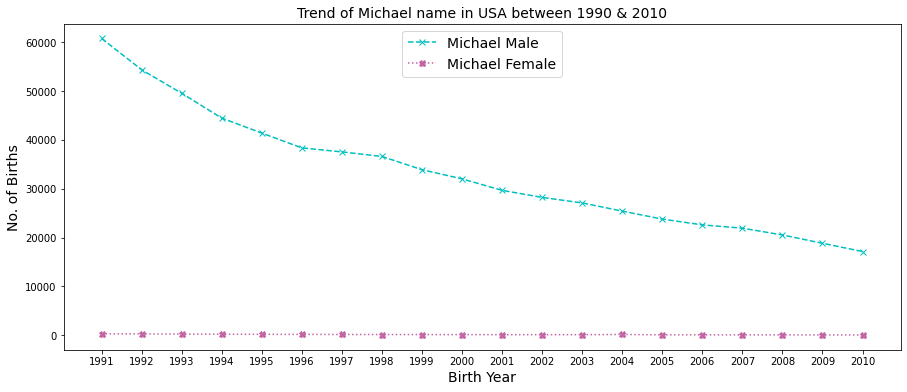

In [34]:
#plt.rcParams["figure.figsize"] = (15,6)
plt.plot(year,michael_male, 'x--c' ,label='Michael Male')
plt.plot(year,michael_female, color='#c365a4', linestyle=':', marker='X', label='Michael Female')
plt.title('Trend of Michael name in USA between 1990 & 2010', fontsize=14)
plt.xlabel('Birth Year', fontsize=14)
plt.ylabel('No. of Births', fontsize=14)
plt.xticks(year)
plt.legend(loc='upper center', fontsize=14)

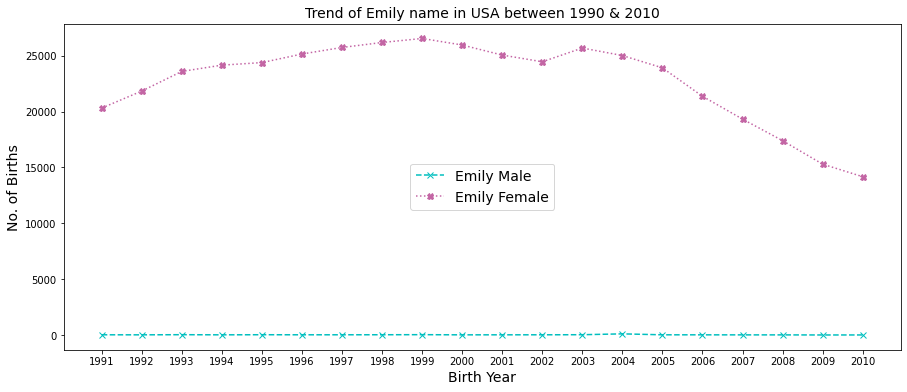

In [35]:
plt.plot(year,emily_male, 'x--c' ,label='Emily Male')
plt.plot(year,emily_female, color='#c365a4', linestyle=':', marker='X', label='Emily Female')
plt.title('Trend of Emily name in USA between 1990 & 2010', fontsize=14)
plt.xlabel('Birth Year', fontsize=14)
plt.ylabel('No. of Births', fontsize=14)
plt.xticks(year)
plt.legend(loc='center', fontsize=14)

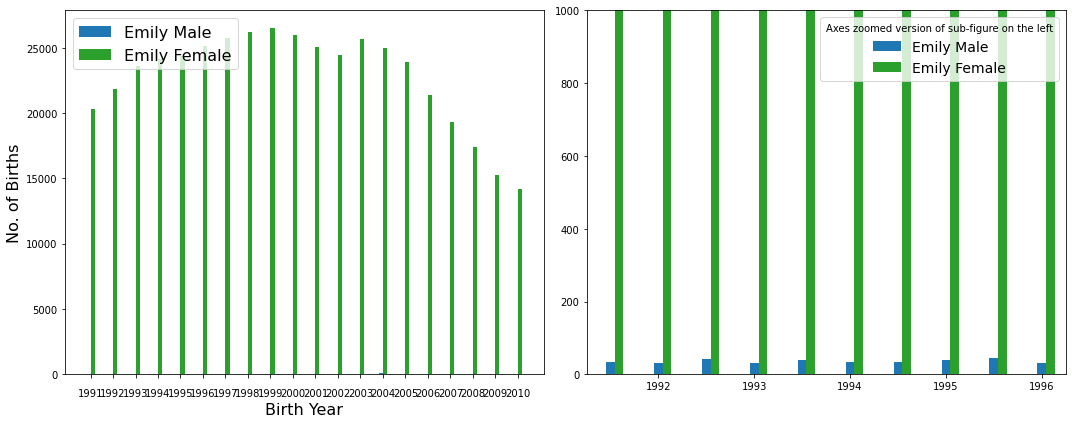

In [36]:
fig, axes = plt.subplots(ncols=2)
width = 0.18
ax=axes[0]
rects1 = ax.bar(year, emily_male, width, label='Emily Male')
rects2 = ax.bar(year+width, emily_female, width, label='Emily Female', color='#2ca02c')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Births', fontsize=16)

ax.set_xlabel('Birth Year', fontsize=16)

ax.set_xticks(year+(width/2))
ax.tick_params(axis='x', which='major', pad=10)
ax.set_xticklabels(year)
ax.legend(loc='upper left', fontsize=16)

axes[1].bar(year, emily_male, width, label='Emily Male')
axes[1].bar(year+width, emily_female, width, label='Emily Female', color='#2ca02c')
axes[1].set_ylim(0,1000)
axes[1].set_xlim(1990.5,2000.5)
axes[1].set_xticklabels(year)
axes[1].legend(title='Axes zoomed version of sub-figure on the left', fontsize=14)

fig.tight_layout()

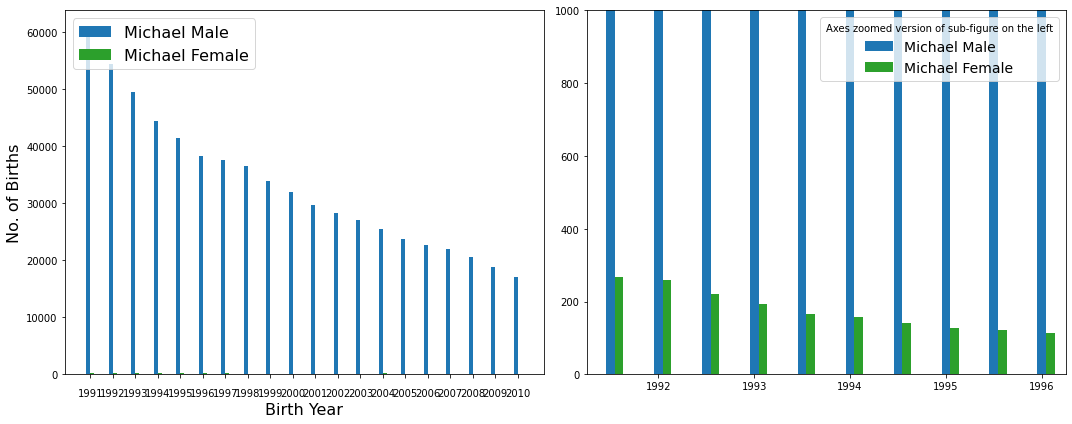

In [37]:
fig, axes = plt.subplots(ncols=2)
width = 0.18
ax = axes[0]
rects1 = ax.bar(year, michael_male, width, label='Michael Male')
rects2 = ax.bar(year+width, michael_female, width, label='Michael Female', color='#2ca02c')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Births', fontsize=16)

ax.set_xlabel('Birth Year', fontsize=16)

ax.set_xticks(year+(width/2))
ax.tick_params(axis='x', which='major', pad=10)
ax.set_xticklabels(year)
ax.legend(loc='upper left', fontsize=16)

axes[1].bar(year, michael_male, width, label='Michael Male')
axes[1].bar(year+width, michael_female, width, label='Michael Female', color='#2ca02c')
axes[1].set_ylim(0,1000)
axes[1].set_xlim(1990.5,2000.5)
axes[1].set_xticklabels(year)
axes[1].legend(title='Axes zoomed version of sub-figure on the left', fontsize=14)

fig.tight_layout()

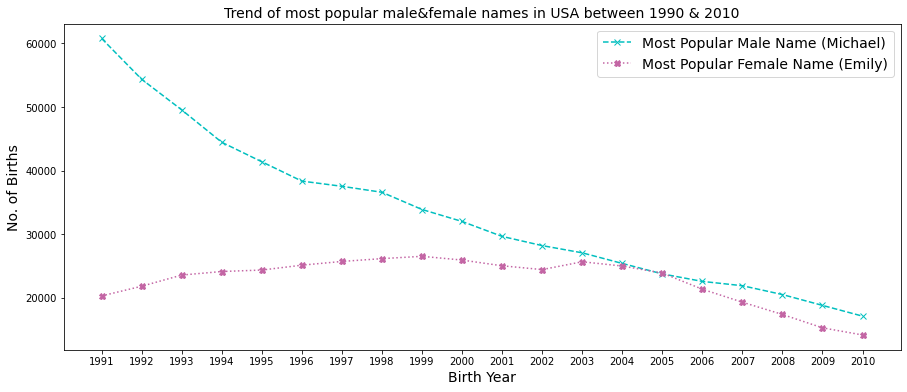

In [42]:
plt.plot(year,michael_male, 'x--c' ,label='Most Popular Male Name (Michael)')
plt.plot(year,emily_female, color='#c365a4', linestyle=':', marker='X', label='Most Popular Female Name (Emily)')
plt.title('Trend of most popular male&female names in USA between 1990 & 2010', fontsize=14)
plt.xlabel('Birth Year', fontsize=14)
plt.ylabel('No. of Births', fontsize=14)
plt.xticks(year)
plt.legend(loc='upper right', fontsize=14)

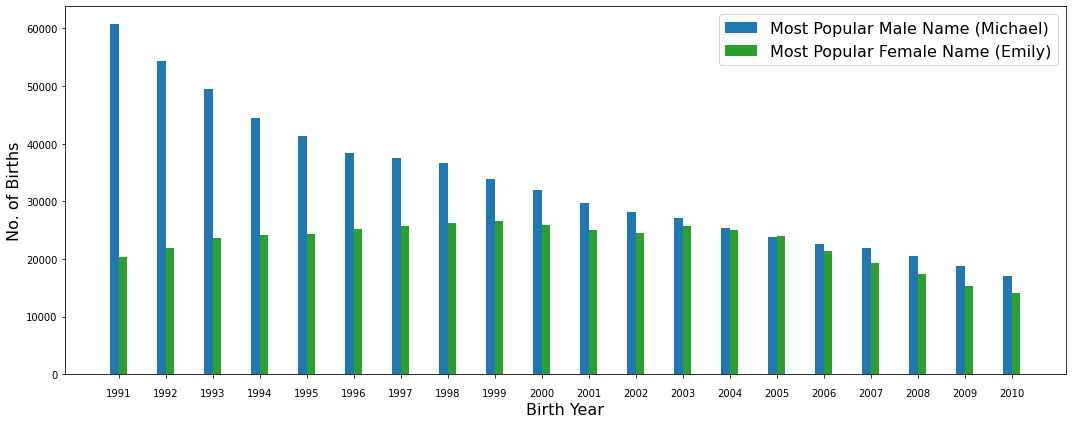

In [40]:
fig, ax = plt.subplots()
width = 0.18

rects1 = ax.bar(year, michael_male, width, label='Most Popular Male Name (Michael)')
rects2 = ax.bar(year+width, emily_female, width, label='Most Popular Female Name (Emily)', color='#2ca02c')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Births', fontsize=16)

ax.set_xlabel('Birth Year', fontsize=16)

ax.set_xticks(year+(width/2))
ax.tick_params(axis='x', which='major', pad=10)
ax.set_xticklabels(year)
ax.legend(loc='upper right', fontsize=16)


fig.tight_layout()